<a href="https://colab.research.google.com/github/dtuleva/DL_23_Lectures_and_Quests/blob/main/DL02_from_video_Training_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!pip list | grep pandas



geopandas                        0.13.2
pandas                           1.5.3
pandas-datareader                0.10.0
pandas-gbq                       0.19.2
pandas-stubs                     1.5.3.230304
sklearn-pandas                   2.2.0


# 02. Training and Improving NN
### from video / colab notebook

In [ ]:
housing_data = pd.read_csv("sample_data/california_housing_train.csv")

In [ ]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


In [ ]:
housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [ ]:
tf.one_hot([1, 2, 3], depth = 3) # input can be from a lookup table for tokens

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
pd.Series([1, 2, 3]).astype("category")

0    1
1    2
2    3
dtype: category
Categories (3, int64): [1, 2, 3]

In [ ]:
pd.Series(["red", "green", "blue", "blue", "red", "red"]).astype("category")

0      red
1    green
2     blue
3     blue
4      red
5      red
dtype: category
Categories (3, object): ['blue', 'green', 'red']

In [ ]:
pd.get_dummies(pd.Series(["red", "green", "blue", "blue", "red", "red"]).astype("category"))

,blue,green,red
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1


In [ ]:
attributes = housing_data.drop(columns = ["median_house_value"])
target = housing_data.median_house_value

In [ ]:
num_columns = attributes.shape[1]
num_outputs = 1 # Regression

DROPOUT_RATE = 0.5 # Usually between 0.1 and 0.5

In [ ]:
attributes_train, attributes_test, targets_train, targets_test = train_test_split(attributes, target, test_size = 4000)
attributes_train.shape, attributes_test.shape, targets_train.shape, targets_test.shape

((13000, 8), (4000, 8), (13000,), (4000,))

In [ ]:
attributes_train, attributes_val, targets_train, targets_val = train_test_split(attributes_train, targets_train, test_size = 2000)
attributes_train.shape, attributes_val.shape, targets_train.shape, targets_val.shape

((11000, 8), (2000, 8), (11000,), (2000,))

In [ ]:
scaler = MinMaxScaler()
attributes_train = scaler.fit_transform(attributes_train)
attributes_val = scaler.transform(attributes_val)
attributes_test = scaler.transform(attributes_test)

In [ ]:
attributes_train.max(axis = 0) # Max per column

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# model = Sequential([
#     Input(num_columns),
#     Dense(32, activation = "relu", kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 0.005, l2 = 0.01)),
#     Dense(64, activation = "relu", kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 0.005, l2 = 0.01)),
#     Dense(32, activation = "relu", kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 0.005, l2 = 0.01)),
#     Dense(num_outputs, activation = None)
# ])

# # Linear Regression
# model = Sequential([
#     Input(num_columns),
#     Dense(num_outputs, activation = None)
# ])

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = Sequential([
    Input(num_columns),
    Dense(2, activation = "relu"),
    Dropout(DROPOUT_RATE),
    Dense(4, activation = "relu"),
    Dropout(DROPOUT_RATE),
    Dense(2, activation = "relu"),
    Dense(num_outputs, activation = None)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 18        
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172

In [ ]:
model.weights[0].shape # Weights are initialized before compiling, can call evaluate(score) before fit.

TensorShape([8, 2])

In [ ]:
# model.predict(attributes_test)

In [ ]:
model.compile(loss = "mse") # defaulf optimizer = "rmsprop"

In [ ]:
history = model.fit(attributes_train, targets_train, epochs = 100, validation_data = (attributes_val, targets_val), callbacks = [EarlyStopping()])

Epoch 1/100
344/344 [==============================] - 8s 11ms/step - loss: 56283258880.0000 - val_loss: 57243267072.0000
Epoch 2/100
344/344 [==============================] - 2s 7ms/step - loss: 56280502272.0000 - val_loss: 57238949888.0000
Epoch 3/100
344/344 [==============================] - 2s 6ms/step - loss: 56274386944.0000 - val_loss: 57231265792.0000
Epoch 4/100
344/344 [==============================] - 2s 6ms/step - loss: 56264273920.0000 - val_loss: 57216991232.0000
Epoch 5/100
344/344 [==============================] - 2s 7ms/step - loss: 56244441088.0000 - val_loss: 57189789696.0000
Epoch 6/100
344/344 [==============================] - 3s 8ms/step - loss: 56208687104.0000 - val_loss: 57140056064.0000
Epoch 7/100
344/344 [==============================] - 2s 7ms/step - loss: 56140644352.0000 - val_loss: 57056661504.0000
Epoch 8/100
344/344 [==============================] - 1s 4ms/step - loss: 56042897408.0000 - val_loss: 56926875648.0000
Epoch 9/100
344/344 [==========

In [ ]:
model.evaluate(attributes_train, targets_train)

344/344 [==============================] - 1s 2ms/step - loss: 23213484032.0000


23213484032.0

In [ ]:
model.evaluate(attributes_test, targets_test)

125/125 [==============================] - 0s 3ms/step - loss: 23340392448.0000


23340392448.0

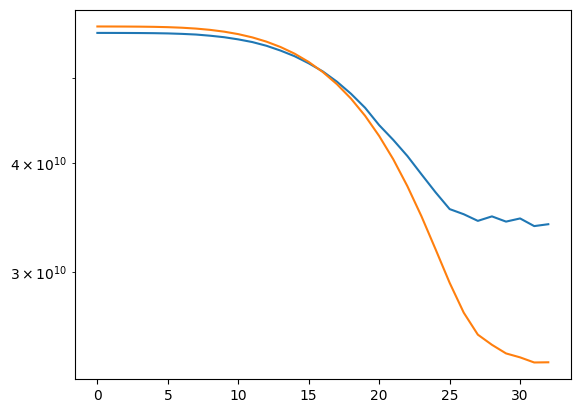

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.semilogy()
plt.show()

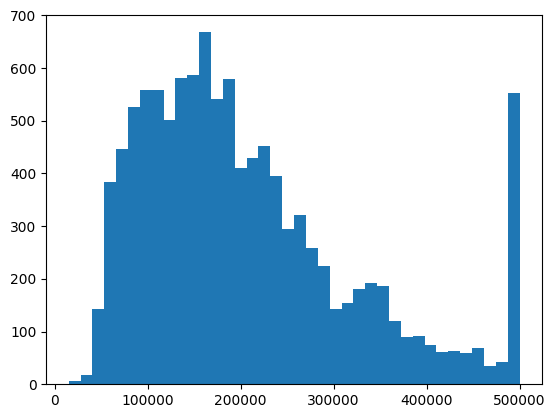

In [ ]:
plt.hist(targets_train, bins = "fd")
plt.show()

#### Bias - Variance Analysis (NOT tradeoff)

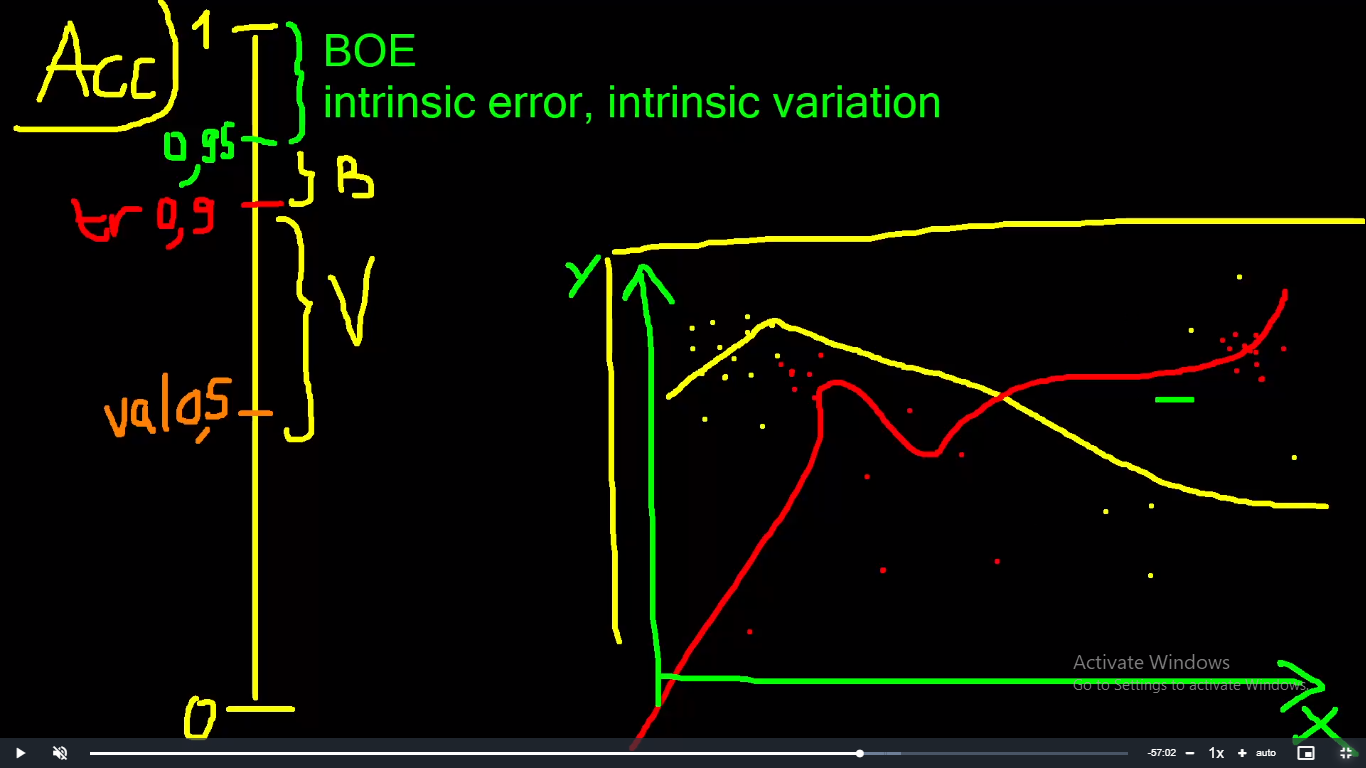

__right__ - a model with both high bias and high variance, no tradeoff possible

__left__ - bigger error (from B and V) >> bigger problem


If train error is very surely higher than base error - algorithm is better than human (example reccomendation systems) >> needs another loss funtion to learn more >> __Self-Supervised learning__

need to remember that the model has no bias and variance by itself; it has __bias/varience on specific DATA__

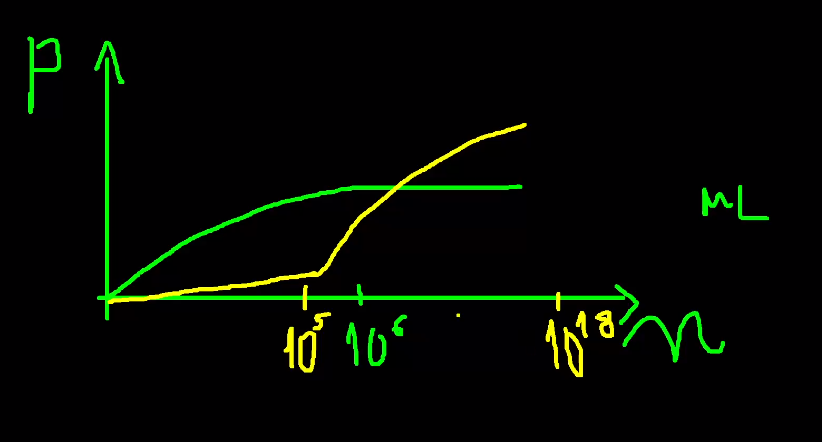

performance / n data

green - NN

yellow - classic ML

for few data or simple task - classic ML performs better

Learning rate scheduling - with callback function



Batch normalisation - same as Standart Scaler in between layers - helps keep the activations (not weights) from vanishing or exploding